In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [215]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import scipy.stats as stats
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score

In [279]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

# Reading the cleaned dataset

In [35]:
df = pd.read_csv('medical_insurance_dataset_cleaned.csv')

In [36]:
df.head()

,Unnamed: 0,age,gender,bmi,no_of_children,smoker,region,charges
0,0,18.0,2,33.770,1,0,4,1725.55
1,1,28.0,2,33.000,3,0,4,4449.46
2,2,33.0,2,22.705,0,0,1,21984.47
3,3,32.0,2,28.880,0,0,1,3866.86
4,4,31.0,1,25.740,0,0,4,3756.62


In [37]:
df.drop("Unnamed: 0" , axis = 1 , inplace = True)

In [38]:
df.head()

,age,gender,bmi,no_of_children,smoker,region,charges
0,18.0,2,33.770,1,0,4,1725.55
1,28.0,2,33.000,3,0,4,4449.46
2,33.0,2,22.705,0,0,1,21984.47
3,32.0,2,28.880,0,0,1,3866.86
4,31.0,1,25.740,0,0,4,3756.62


# Split our dataset (Training Dataset , Testing Dataset) 

In [22]:
y_data = df[['charges']]

In [23]:
x_data = df

In [24]:
x_data.drop("charges" , axis = 1 , inplace = True)

In [25]:
x_train , x_test , y_train , y_test = train_test_split(x_data , y_data , test_size = 0.10 , random_state = 4)

In [31]:
print("number of training samples : " , x_train.shape[0])
print("number of testing samples : " , x_test.shape[0])

number of training samples :  2493
number of testing samples :  278


# 1) Linear Regression Model:

Fit a linear regression model that may be used to predict the 'charges' value, just by using the 'smoker' attribute of the dataset

In [8]:
lr = LinearRegression()

In [32]:
lr.fit(x_train[['smoker']] , y_train)

LinearRegression()

Draw the residual plot (Residuals vs. predicted values)

In [46]:
Residuals = y_test - lr.predict(x_test[['smoker']])

Residual Plot can be like that 

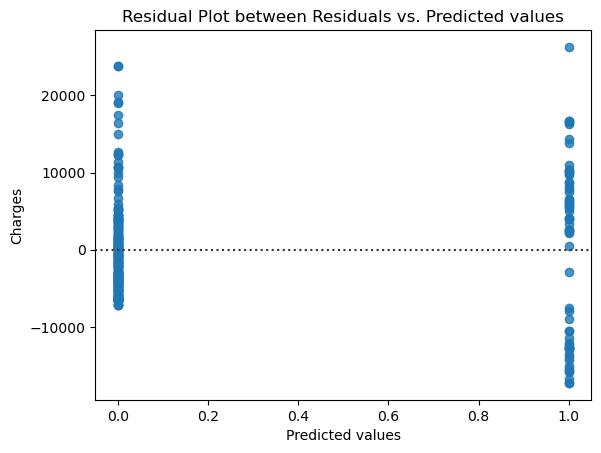

In [52]:
sns.residplot(x = lr.predict(x_test[['smoker']]) , y = Residuals)
plt.xlabel("Predicted values")
plt.ylabel("Charges")
plt.title("Residual Plot between Residuals vs. Predicted values")
plt.show()

OR like that ...

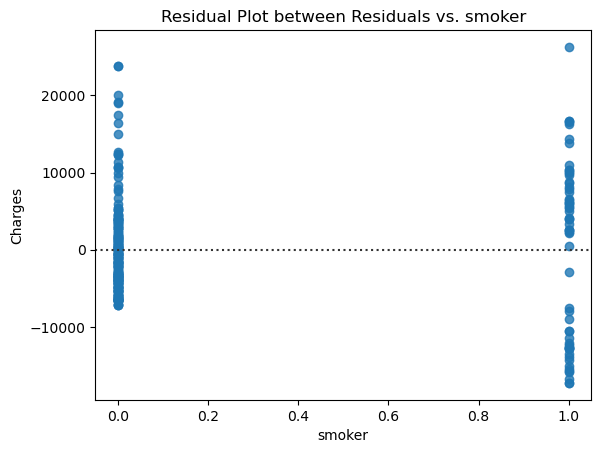

In [54]:
sns.residplot(x = x_test[['smoker']] , y = Residuals)
plt.xlabel("smoker")
plt.ylabel("Charges")
plt.title("Residual Plot between Residuals vs. smoker")
plt.show()

Let's calculate R^2 : 

In [58]:
print('The R^2 = ' , lr.score(x_data[['smoker']] , y_data))

The R^2 =  0.62274117998028


Another way to Fit a linear regression model :

In [42]:
import statsmodels.api as sm 
from statsmodels.formula.api import ols

In [43]:
# fit simple linear regression model 
linear_model = ols('charges ~ smoker', data=df).fit()

In [44]:
# display model summary 
print(linear_model.summary())

                            OLS Regression Results                            
Dep. Variable:                charges   R-squared:                       0.623
Model:                            OLS   Adj. R-squared:                  0.623
Method:                 Least Squares   F-statistic:                     4571.
Date:                Tue, 21 Nov 2023   Prob (F-statistic):               0.00
Time:                        11:44:09   Log-Likelihood:                -28643.
No. Observations:                2771   AIC:                         5.729e+04
Df Residuals:                    2769   BIC:                         5.730e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   8417.8744    158.894     52.978      0.0

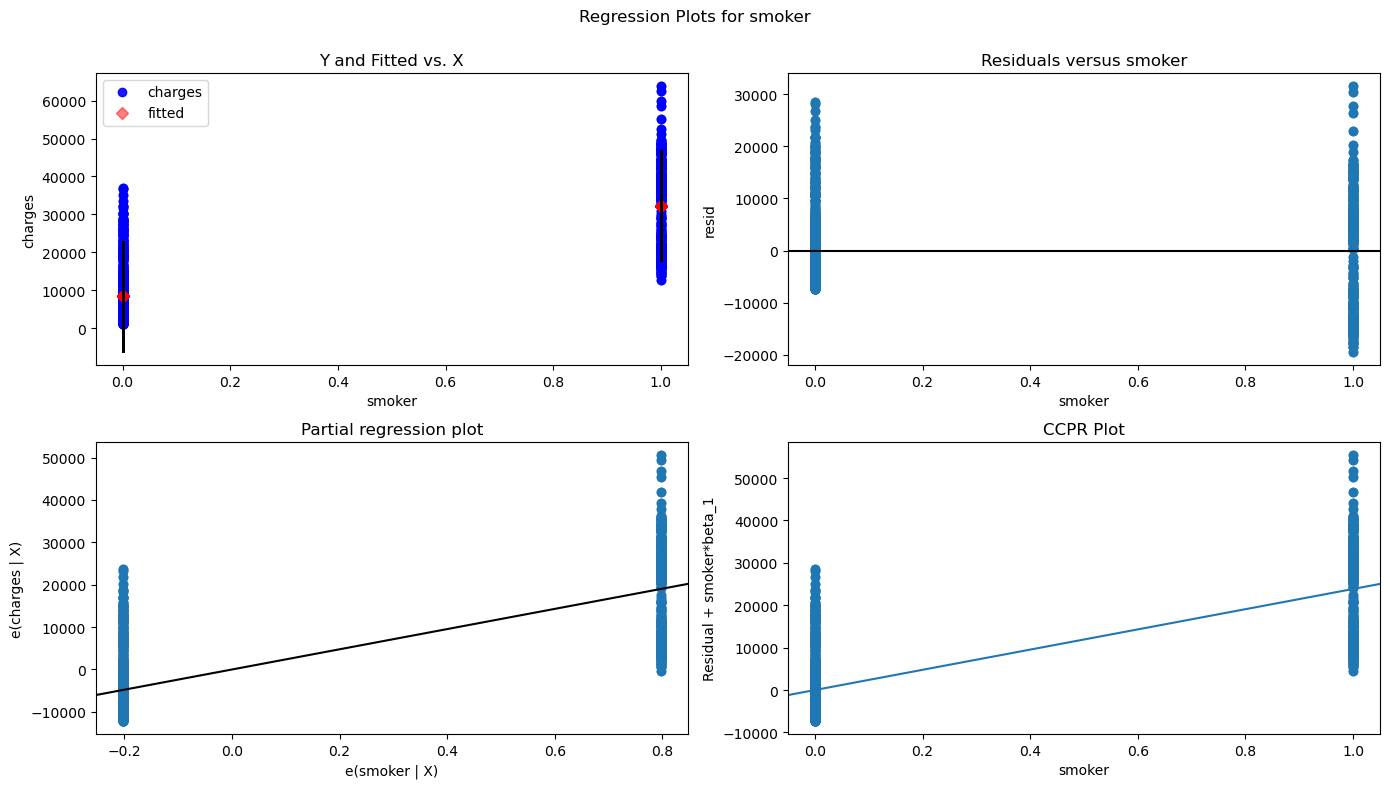

In [45]:
# modify figure size 
fig = plt.figure(figsize=(14, 8)) 
  
# creating regression plots 
fig = sm.graphics.plot_regress_exog(linear_model, 'smoker', fig=fig)

Distribution Plot :

1) Training Data 
2) Testing Data

C:\Users\Alaa AI\AppData\Local\Temp\ipykernel_13644\1957370887.py:16: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax1 = sns.distplot(y_train, hist=False, color="r", label="Actual Value" , kde=True , ax = axis[0])
C:\Users\Alaa AI\AppData\Local\Temp\ipykernel_13644\1957370887.py:17: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed

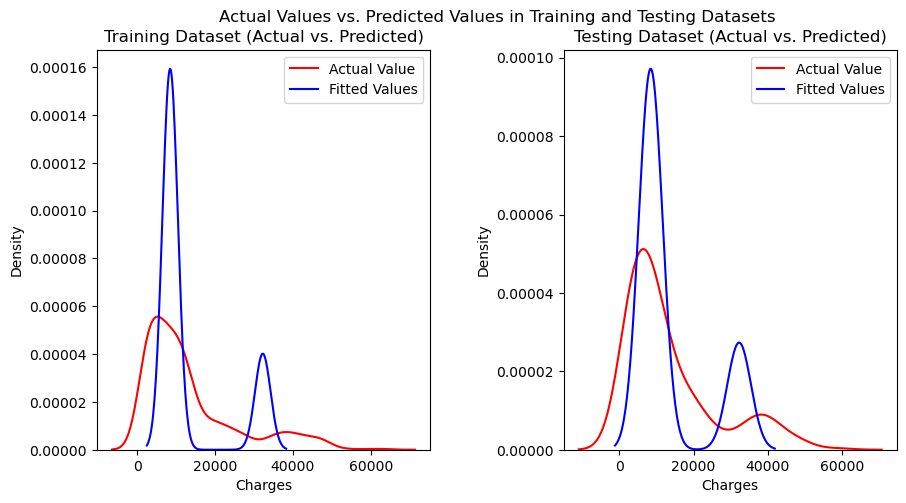

In [197]:
figure , axis  = plt.subplots(1, 2, figsize=(10,5)) #1 Row X 2 COls
# set the spacing between subplots
plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.4, 
                    hspace=0.4)
figure.suptitle('Actual Values vs. Predicted Values in Training and Testing Datasets')
axis[0].set_title("Training Dataset (Actual vs. Predicted)")
axis[1].set_title("Testing Dataset (Actual vs. Predicted)")



#For Training Dataset
ax1 = sns.distplot(y_train, hist=False, color="r", label="Actual Value" , kde=True , ax = axis[0])
sns.distplot(lr.predict(x_train[['smoker']]), hist=False, color="b", label="Fitted Values" ,axlabel="Charges" ,  ax=ax1 , kde = True)

#For Testing Dataset
ax2 = sns.distplot(y_test, hist=False, color="r", label="Actual Value" , kde=True , ax = axis[1])
sns.distplot(lr.predict(x_test[['smoker']]), hist=False, color="b", label="Fitted Values" ,axlabel="Charges", ax=ax2 , kde = True)

# plt.xlabel("Charges")
# plt.ylabel("Proportion of charges")
axis[0].legend()
axis[1].legend()

plt.show()
plt.close()

# 2) Multiple Linear Regression :

Fit a Multiple linear regression model that may be used to predict the 'charges' value, just by using all attributes of the dataset

In [77]:
mlr = LinearRegression()

In [78]:
mlr.fit(x_train , y_train)

LinearRegression()

Draw the residual plot (Residuals vs. predicted values)

In [79]:
Residuals = y_test - mlr.predict(x_test)

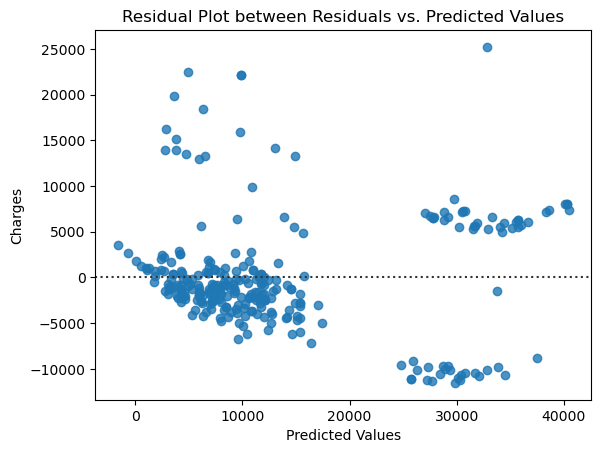

In [86]:
sns.residplot(x = mlr.predict(x_test) , y = Residuals)
plt.xlabel("Predicted Values")
plt.ylabel("Charges")
plt.title("Residual Plot between Residuals vs. Predicted Values")
plt.show()

You should get one of the attribute to be plotted vs. Residuals , as an example I used 'age' feature , Try another feature as you like.

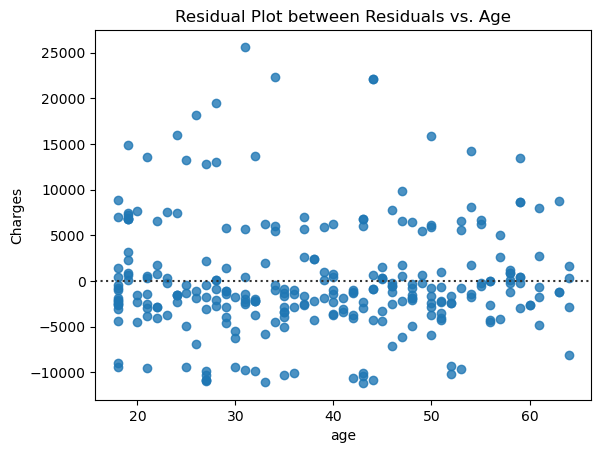

In [87]:
sns.residplot(x = x_test[['age']] , y = Residuals)
plt.xlabel("age")
plt.ylabel("Charges")
plt.title("Residual Plot between Residuals vs. Age")
plt.show()

Let's Calculate R^2 : 

In [94]:
print('The R^2 = ' , mlr.score(x_data , y_data))

The R^2 =  0.7505795268040812


Another method for Getting the multiple Linear Regression:

In [89]:
import statsmodels.api as sm 
from statsmodels.formula.api import ols

In [90]:
# fit simple linear regression model 
mulitple_linear_model = ols('charges ~ age+gender+bmi+no_of_children+smoker+region', data=df).fit()

In [91]:
# display model summary 
print(mulitple_linear_model.summary()) 

                            OLS Regression Results                            
Dep. Variable:                charges   R-squared:                       0.751
Model:                            OLS   Adj. R-squared:                  0.750
Method:                 Least Squares   F-statistic:                     1386.
Date:                Tue, 21 Nov 2023   Prob (F-statistic):               0.00
Time:                        13:28:58   Log-Likelihood:                -28070.
No. Observations:                2771   AIC:                         5.615e+04
Df Residuals:                    2764   BIC:                         5.620e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept      -1.131e+04    739.308    -15.

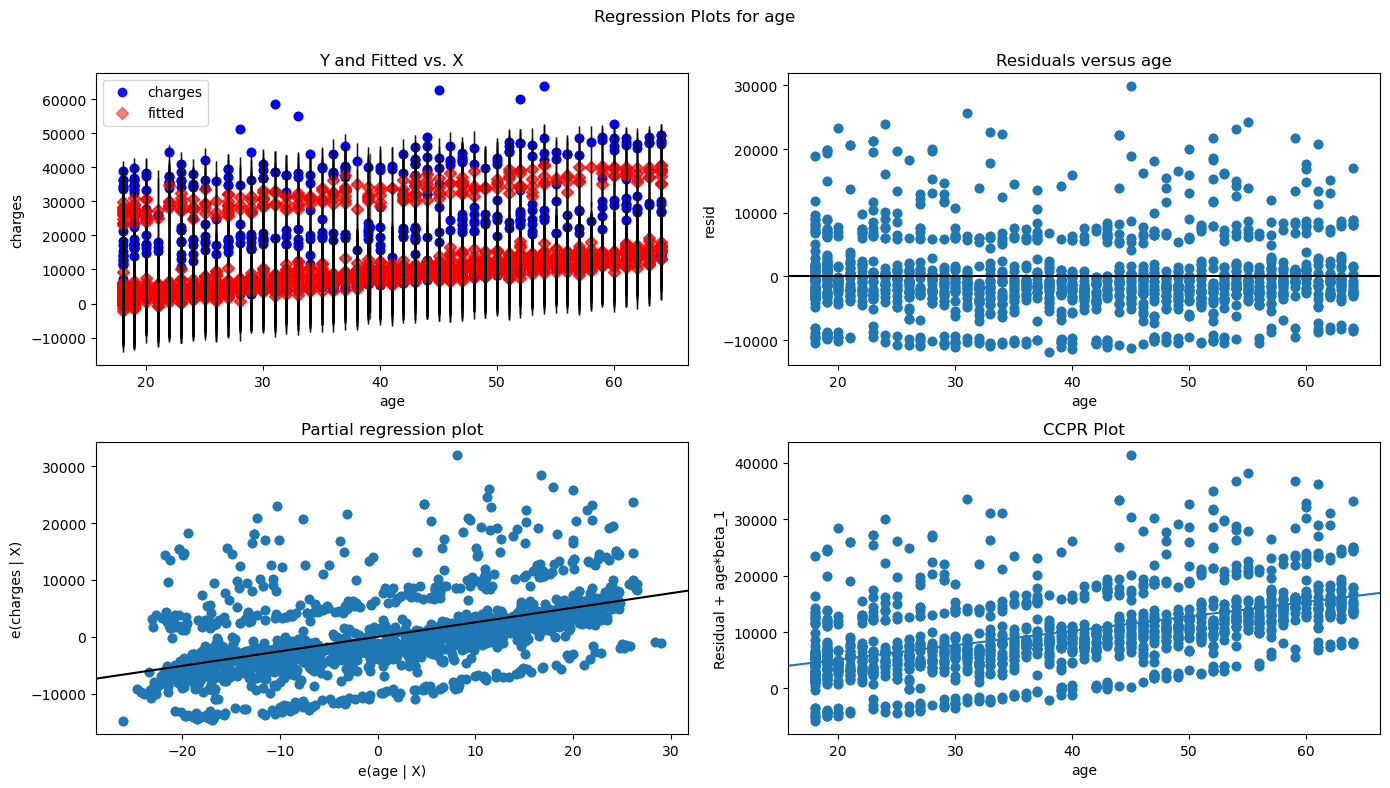

In [92]:
# modify figure size 
fig = plt.figure(figsize=(14, 8)) 
  
# creating regression plots 
fig = sm.graphics.plot_regress_exog(mulitple_linear_model, 'age', fig=fig)

Distribution Plot :

1) Training Data
2) Testing Data

C:\Users\Alaa AI\AppData\Local\Temp\ipykernel_13644\456031517.py:18: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax1 = sns.distplot(y_train, hist=False, color="r", label="Actual Value" , kde=True , ax = axis[0])
C:\Users\Alaa AI\AppData\Local\Temp\ipykernel_13644\456031517.py:19: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed29

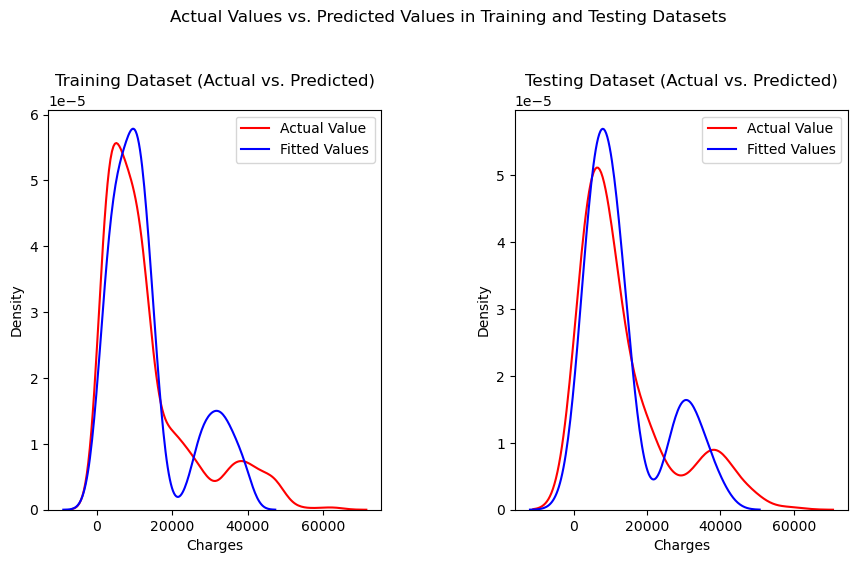

In [195]:
figure , axis  = plt.subplots(1, 2, figsize=(10,5)) #1 Row X 2 COls
# set the spacing between subplots
plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.4, 
                    hspace=0.4)

figure.suptitle('Actual Values vs. Predicted Values in Training and Testing Datasets' , y = 1.1)

axis[0].set_title("Training Dataset (Actual vs. Predicted)")
axis[1].set_title("Testing Dataset (Actual vs. Predicted)")



#For Training Dataset
ax1 = sns.distplot(y_train, hist=False, color="r", label="Actual Value" , kde=True , ax = axis[0])
sns.distplot(mlr.predict(x_train), hist=False, color="b", label="Fitted Values" ,axlabel="Charges" ,  ax=ax1 , kde = True)

#For Testing Dataset
ax2 = sns.distplot(y_test, hist=False, color="r", label="Actual Value" , kde=True , ax = axis[1])
sns.distplot(mlr.predict(x_test), hist=False, color="b", label="Fitted Values" ,axlabel="Charges", ax=ax2 , kde = True)

# plt.xlabel("Charges")
# plt.ylabel("Proportion of charges")
axis[0].legend()
axis[1].legend()

plt.show()
plt.close()

# 3) Polynomial Regression :

Fit a Polynomial regression model that may be used to predict the 'charges' value.

# Polynomial With Degree and LinearRegression without Pipeline : 

Getting the best order of Polynomial using R-squared : 

In [256]:
plr = LinearRegression()

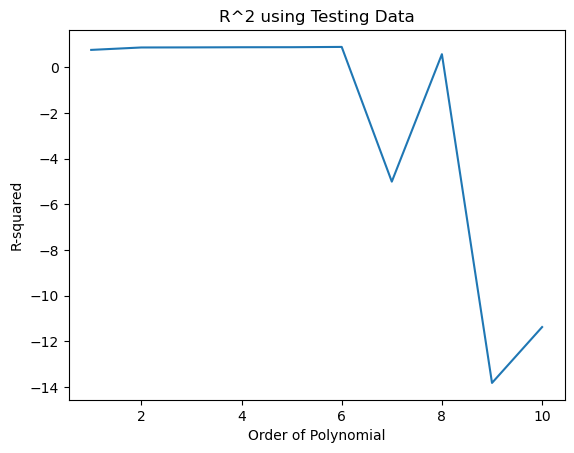

In [257]:
Rsquared_test = []

order = [1 , 2 , 3 , 4 , 5 , 6 , 7 , 8 , 9 , 10]
for n in order:
    pr = PolynomialFeatures(degree = n)
    x_train_pr = pr.fit_transform(x_train)
    x_test_pr = pr.fit_transform(x_test)
    
    plr.fit(x_train_pr , y_train)
    Rsquared_test.append(plr.score(x_test_pr , y_test))
    
plt.plot(order , Rsquared_test)
plt.xlabel("Order of Polynomial")
plt.ylabel("R-squared")
plt.title("R^2 using Testing Data")
plt.show()

In [273]:
pr = PolynomialFeatures(degree = 6)

In [274]:
x_train_pr = pr.fit_transform(x_train)
x_test_pr = pr.fit_transform(x_test)

In [275]:
plr.fit(x_train_pr , y_train)

LinearRegression()

In [276]:
print("The R-squared = ",plr.score(x_test_pr , y_test))

The R-squared =  0.882404647693891


C:\Users\Alaa AI\AppData\Local\Temp\ipykernel_13644\2756405763.py:16: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax1 = sns.distplot(y_train, hist=False, color="r", label="Actual Value" , kde=True , ax = axis[0])
C:\Users\Alaa AI\AppData\Local\Temp\ipykernel_13644\2756405763.py:17: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed

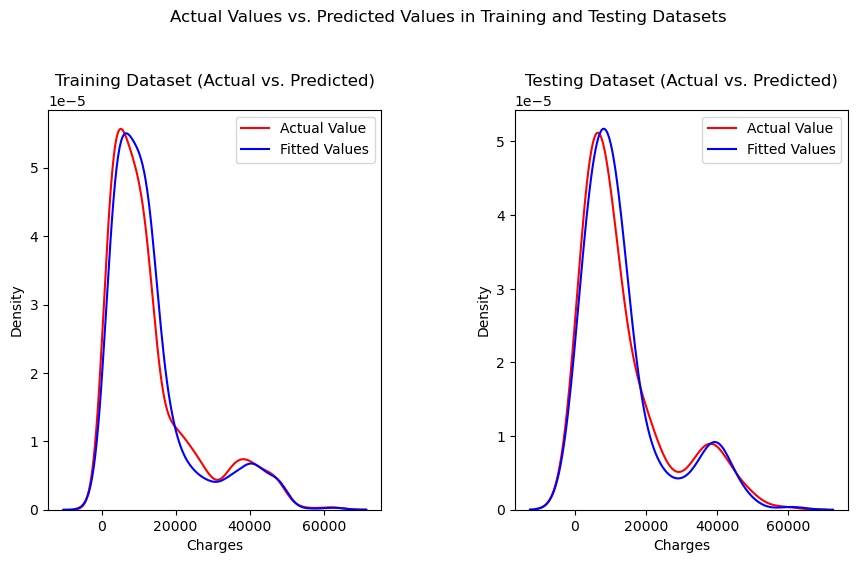

In [277]:
figure , axis  = plt.subplots(1, 2, figsize=(10,5)) #1 Row X 2 COls
# set the spacing between subplots
plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.4, 
                    hspace=0.4)
figure.suptitle('Actual Values vs. Predicted Values in Training and Testing Datasets' , y = 1.1)
axis[0].set_title("Training Dataset (Actual vs. Predicted)")
axis[1].set_title("Testing Dataset (Actual vs. Predicted)")



#For Training Dataset
ax1 = sns.distplot(y_train, hist=False, color="r", label="Actual Value" , kde=True , ax = axis[0])
sns.distplot(plr.predict(x_train_pr), hist=False, color="b", label="Fitted Values" ,axlabel="Charges" ,  ax=ax1 , kde = True)

#For Testing Dataset
ax2 = sns.distplot(y_test, hist=False, color="r", label="Actual Value" , kde=True , ax = axis[1])
sns.distplot(plr.predict(x_test_pr), hist=False, color="b", label="Fitted Values" ,axlabel="Charges", ax=ax2 , kde = True)

# plt.xlabel("Charges")
# plt.ylabel("Proportion of charges")
axis[0].legend()
axis[1].legend()

plt.show()
plt.close()

# Pipeline:


In [244]:
Input = [('scale' , StandardScaler()) , ('polynomial' , PolynomialFeatures(include_bias = False)) , ('model' , LinearRegression())]

In [245]:
pipe = Pipeline(Input)

In [246]:
x_train = x_train.astype(float)

In [247]:
pipe.fit(x_train , y_train)

Pipeline(steps=[('scale', StandardScaler()),
                ('polynomial', PolynomialFeatures(include_bias=False)),
                ('model', LinearRegression())])

In [248]:
ypipe = pipe.predict(x_test)

In [249]:
ypipe_df = pd.DataFrame(ypipe.tolist())

In [251]:
print("The R-squared = " ,r2_score(y_test , ypipe))

The R-squared =  0.8581700690274137


C:\Users\Alaa AI\AppData\Local\Temp\ipykernel_13644\3769044164.py:18: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax1 = sns.distplot(y_train, hist=False, color="r", label="Actual Value" , kde=True , ax = axis[0])
C:\Users\Alaa AI\AppData\Local\Temp\ipykernel_13644\3769044164.py:19: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed

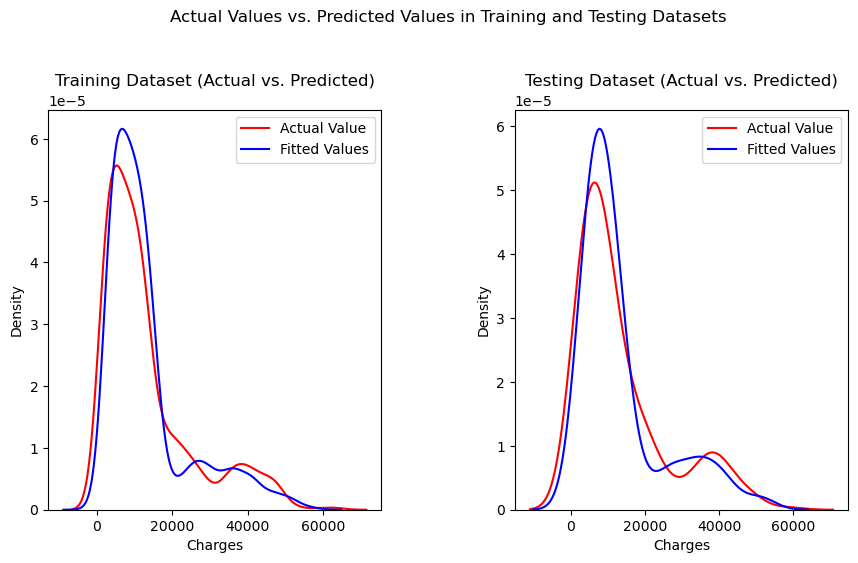

In [252]:
figure , axis  = plt.subplots(1, 2, figsize=(10,5)) #1 Row X 2 COls
# set the spacing between subplots
plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.4, 
                    hspace=0.4)

figure.suptitle('Actual Values vs. Predicted Values in Training and Testing Datasets' , y = 1.1)

axis[0].set_title("Training Dataset (Actual vs. Predicted)")
axis[1].set_title("Testing Dataset (Actual vs. Predicted)")



#For Training Dataset
ax1 = sns.distplot(y_train, hist=False, color="r", label="Actual Value" , kde=True , ax = axis[0])
sns.distplot(pipe.predict(x_train), hist=False, color="b", label="Fitted Values" ,axlabel="Charges" ,  ax=ax1 , kde = True)

#For Testing Dataset
ax2 = sns.distplot(y_test, hist=False, color="r", label="Actual Value" , kde=True , ax = axis[1])
sns.distplot(pipe.predict(x_test), hist=False, color="b", label="Fitted Values" ,axlabel="Charges", ax=ax2 , kde = True)

# plt.xlabel("Charges")
# plt.ylabel("Proportion of charges")
axis[0].legend()
axis[1].legend()

plt.show()
plt.close()

# 4) Ridge Regression :

# Without Polynomial Features :

In [280]:
RidgeModel = Ridge(alpha = 0.1)

In [281]:
RidgeModel.fit(x_train , y_train)

Ridge(alpha=0.1)

In [282]:
yhat = RidgeModel.predict(x_test)

In [283]:
print(r2_score(y_test , yhat))

0.752376494303952


C:\Users\Alaa AI\AppData\Local\Temp\ipykernel_13644\1100062412.py:18: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax1 = sns.distplot(y_train, hist=False, color="r", label="Actual Value" , kde=True , ax = axis[0])
C:\Users\Alaa AI\AppData\Local\Temp\ipykernel_13644\1100062412.py:19: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed

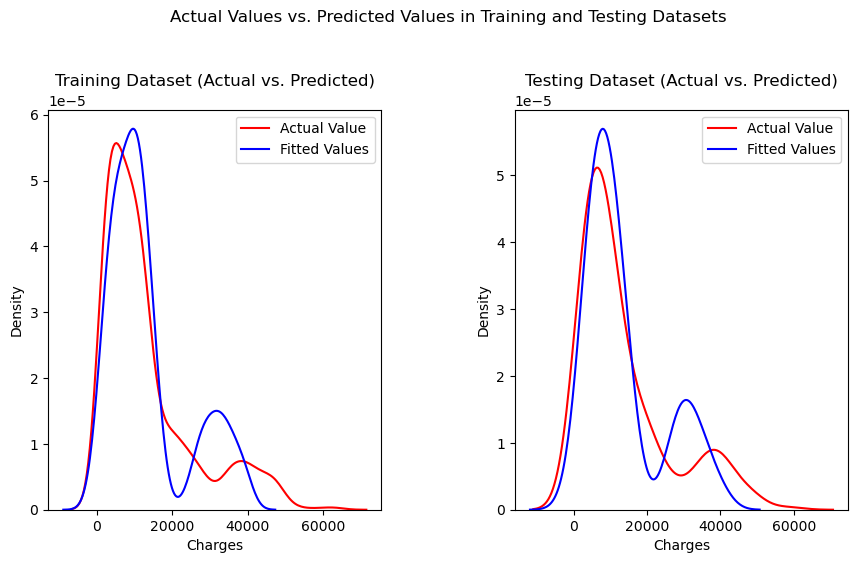

In [284]:
figure , axis  = plt.subplots(1, 2, figsize=(10,5)) #1 Row X 2 COls
# set the spacing between subplots
plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.4, 
                    hspace=0.4)

figure.suptitle('Actual Values vs. Predicted Values in Training and Testing Datasets' , y = 1.1)

axis[0].set_title("Training Dataset (Actual vs. Predicted)")
axis[1].set_title("Testing Dataset (Actual vs. Predicted)")



#For Training Dataset
ax1 = sns.distplot(y_train, hist=False, color="r", label="Actual Value" , kde=True , ax = axis[0])
sns.distplot(RidgeModel.predict(x_train), hist=False, color="b", label="Fitted Values" ,axlabel="Charges" ,  ax=ax1 , kde = True)

#For Testing Dataset
ax2 = sns.distplot(y_test, hist=False, color="r", label="Actual Value" , kde=True , ax = axis[1])
sns.distplot(RidgeModel.predict(x_test), hist=False, color="b", label="Fitted Values" ,axlabel="Charges", ax=ax2 , kde = True)

# plt.xlabel("Charges")
# plt.ylabel("Proportion of charges")
axis[0].legend()
axis[1].legend()

plt.show()
plt.close()

# With Polynomial Features : 

Get the best Polynomial Order : 

C:\Users\Administrator\anaconda3\Lib\site-packages\sklearn\linear_model\_ridge.py:211: LinAlgWarning: Ill-conditioned matrix (rcond=5.05852e-19): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
C:\Users\Administrator\anaconda3\Lib\site-packages\sklearn\linear_model\_ridge.py:211: LinAlgWarning: Ill-conditioned matrix (rcond=1.08655e-22): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
C:\Users\Administrator\anaconda3\Lib\site-packages\sklearn\linear_model\_ridge.py:250: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn(
C:\Users\Administrator\anaconda3\Lib\site-packages\sklearn\linear_model\_ridge.py:250: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn(
C:\Users\Administrator\anaconda3\Lib\site-packages\sklearn\linear_model\_ridge.py:250: UserWarning: Singular matrix in solving dua

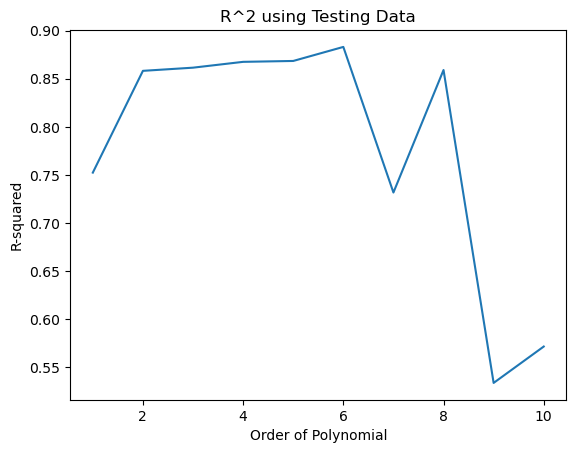

In [301]:
Rsquared_test = []

order = [1 , 2 , 3 , 4 , 5 , 6 , 7 , 8 , 9 , 10]
for n in order:
    pr = PolynomialFeatures(degree = n)
    x_train_pr = pr.fit_transform(x_train)
    x_test_pr = pr.fit_transform(x_test)
    
    RidgeModel.fit(x_train_pr , y_train)
    y_hat = RidgeModel.predict(x_test_pr)
    Rsquared_test.append(r2_score(y_test,y_hat))
    
plt.plot(order , Rsquared_test)
plt.xlabel("Order of Polynomial")
plt.ylabel("R-squared")
plt.title("R^2 using Testing Data")
plt.show()

In [302]:
pr = PolynomialFeatures(degree=6)

In [303]:
x_train_pr = pr.fit_transform(x_train)
x_test_pr = pr.fit_transform(x_test)

In [304]:
RidgeModel.fit(x_train_pr, y_train)

Ridge(alpha=0.1)

In [305]:
y_hat = RidgeModel.predict(x_test_pr)

In [306]:
print("The R-squared = ",r2_score(y_test,y_hat))

0.8830374522354582
